# Half Cheetah with NEAT brain

## Imports

In [9]:
import gym
import random as r
import os
import neat
import msvcrt as m
from sys import exit
import visualize
import parallel
from IPython.display import clear_output

#remember to start xming server by using 
#set DISPLAY=:0 
#in the command line
#Build the environment for the cheetah
env = gym.make('HalfCheetah-v2') #This is a global definition
#env.metadata('video.frames_per_second' : 5)

#load the config file
config_path = os.path.join('config.txt')

## Functions to connect the brain to the environment, run the brain and assess the effectiveness

In [10]:
def connect_brain(nLimbs, nCycles, net, render = False):
    '''
    Connect brain takes arguments:
    number of limbs = 6 for cheetah sausage
    number of cycles = run time for each NN to control the cheetah
    net = the NN object
    render = flag to render the simulation to screen    
    
    Connecting the brain effectively feeds the NN input nodes with the state of the environment, 
    and feeds the environment with the output nodes of the NN
    '''
    
    #reseting the cheetah environment
    env.reset()

    
    #initialise an empty set with the number of control inputs going to mujoco
    x = [] 
    for i in range(nLimbs):
        x.append(0)
    
    #After each step of the envronment running, a result is returned that contains:
    #observation for the NN brain to see that is fed to the NN input
    #reward = the distance traveled during that cycle of the simulation with a maximum goal
    #Result needs to be initialised (with a set of controls set to 0) to be fed to the neural network
    
    #result = env.step(x) 
    #observation = result [0]
    #reward = result [1]
    observation = env.reset()
    fitness = 0
    
    #control is the set of output nodes from the NN
    control = net.activate(observation) #0th observation to initialise control
    
    for i in range(nCycles): 
        #The NN is activated by giving observation to the input nodes, and storing the output nodes in control
        control = net.activate(observation)
        
        #Control needs to be set the the correct range
        #This code was eliminated by changing the activation options in the config file to tanh
        #the NN outputs a float between 0 and 1
        #the environment takes a float between -1 and 1
        #for j in range(len(control)):
        #    control[j] = control[j]*2 - 1
        
        #This loop creates a delay between the NN brain and the environment body.
        #This simulates the natural delay between signal and action and allows 
        #commands to be completed before a new command is given.
        for j in range(1): #stepping through multiple times to delay the NN
            #output of the environment is stored and split into useable data
            result = env.step(control) 
            reward = result [1]
            observation = result[0]
             
            #reward is summed to make fitness; the total distance travelled in the given number of cycles
            fitness = fitness + reward
        
            if render:
                env.render()
                
    return fitness/nCycles
    
    

def new_pop(config_file):
    '''
    function to create a new population for assessment 
    config_file is used to set the initial state of the population
    '''
    
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file) 

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))
    
    return p, stats, config
    
    

#This is the fitness function
def eval_genomes(genomes, config):
    
    for genome_id, genome in genomes:
        
        limbs = len(env.action_space.sample())
        cycles = 200
        #Builds the neural net from the genome
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        genome.fitness = connect_brain(limbs, cycles, net)
        #return genome.fitness
    #clear_output() #only use this if you want to minimise the display
  

## Make a new population and run for n generations

In [8]:
#number of generations
n = 200

p, stats, config = new_pop(config_path)
pe = neat.ParallelEvaluator(4,eval_genomes, timeout = 100)
p.run(eval_genomes,n)
#p.run(pe.evaluate, n)



 ****** Running generation 0 ****** 

Population's average fitness: -2.52522 stdev: 0.99096
Best fitness: -0.27870 - size: (12, 12) - species 3 - id 281
Average adjusted fitness: 0.544
Mean genetic distance 3.133, standard deviation 0.292
Population of 298 members in 17 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    11     -1.5    0.328     0
     2    0    16     -1.8    0.399     0
     3    0    22     -0.3    0.635     0
     4    0    20     -0.4    0.605     0
     5    0    19     -0.3    0.613     0
     6    0    22     -0.3    0.642     0
     7    0    18     -0.8    0.557     0
     8    0    15     -1.8    0.462     0
     9    0    19     -0.4    0.663     0
    10    0    18     -1.1    0.600     0
    11    0    16     -1.8    0.494     0
    12    0    18     -0.4    0.717     0
    13    0    20     -1.1    0.530     0
    14    0    17     -1.5    0.566     0
    15    0    15     -1.4    0.466     0
    1

Population's average fitness: -0.81541 stdev: 0.55846
Best fitness: 0.04480 - size: (13, 15) - species 15 - id 862
Average adjusted fitness: 0.669
Mean genetic distance 2.874, standard deviation 0.526
Population of 299 members in 17 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    15     -0.4    0.542     0
     2    8    16     -0.5    0.569     0
     3    8    20     -0.2    0.726     2
     4    8    18     -0.3    0.685     0
     5    8    19     -0.2    0.742     3
     6    8    17     -0.3    0.701     5
     7    8    23     -0.3    0.692     0
     8    8    17     -0.2    0.635     0
     9    8    19     -0.3    0.767     3
    10    8    18     -0.3    0.650     0
    11    8    13      0.0    0.507     0
    12    8    19     -0.2    0.745     5
    13    8    22     -0.3    0.713     0
    14    8    19     -0.4    0.689     1
    15    8    10      0.0    0.710     0
    16    8    18     -0.2    0.719     0
  

KeyboardInterrupt: 

## Load the population from a checkpoint

In [11]:
#Continue running from previous saved file

checkpoint = 'neat-checkpoint-199'

config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_path) 

p = neat.Checkpointer.restore_checkpoint(checkpoint)  

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5))


## Continue running the assessment of the loaded population

In [42]:
# Run for up to n generations.
n = 100

winner = p.run(eval_genomes, n)


# Display the winning genome.
print('\nBest genome:\n{!s}'.format(p.best_genome))  


 ****** Running generation 100 ****** 

Population's average fitness: 24.41884 stdev: 50.24652
Best fitness: 133.17777 - size: (13, 13) - species 20 - id 26063
Average adjusted fitness: 0.532
Mean genetic distance 2.338, standard deviation 0.487
Population of 300 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    15  100    95    131.6    0.481     5
    20    1   205    133.2    0.583     0
Total extinctions: 0
Generation time: 3.103 sec (3.234 average)
Saving checkpoint to neat-checkpoint-100

 ****** Running generation 101 ****** 

Population's average fitness: 31.21697 stdev: 48.15259
Best fitness: 143.21434 - size: (14, 15) - species 20 - id 26528
Average adjusted fitness: 0.488
Mean genetic distance 2.351, standard deviation 0.514
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    15  101   127    126.5    0.440     6
    20    2   146    143.2 

Population's average fitness: 44.57467 stdev: 50.01903
Best fitness: 141.28333 - size: (16, 13) - species 20 - id 30419
Average adjusted fitness: 0.652
Mean genetic distance 2.543, standard deviation 0.522
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    20   16    91    141.3    0.669    12
    21   14    80    140.0    0.623     8
    22    4   129    133.1    0.663     2
Total extinctions: 0
Generation time: 3.085 sec (3.075 average)
Saving checkpoint to neat-checkpoint-115

 ****** Running generation 116 ****** 

Population's average fitness: 40.01299 stdev: 51.93604
Best fitness: 174.47103 - size: (15, 17) - species 21 - id 30341
Average adjusted fitness: 0.497
Mean genetic distance 2.577, standard deviation 0.579
Population of 301 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    20   17   104    128.5    0.528    13
    21   15    88    174.5

Population's average fitness: 46.17134 stdev: 52.59983
Best fitness: 172.25629 - size: (17, 23) - species 21 - id 34828
Average adjusted fitness: 0.538
Mean genetic distance 2.416, standard deviation 0.668
Population of 300 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    21   29   139    172.3    0.491     6
    23    3   161    128.4    0.586     1
Total extinctions: 0
Generation time: 3.144 sec (3.143 average)
Saving checkpoint to neat-checkpoint-130

 ****** Running generation 131 ****** 

Population's average fitness: 42.17541 stdev: 51.55481
Best fitness: 151.19824 - size: (13, 10) - species 23 - id 34660
Average adjusted fitness: 0.601
Mean genetic distance 2.422, standard deviation 0.646
Population of 300 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    21   30   140    150.3    0.567     7
    23    4   160    151.2    0.636     0
Total extinctions: 0
Gener


 ****** Running generation 146 ****** 

Population's average fitness: 48.25710 stdev: 51.73824
Best fitness: 159.29603 - size: (16, 16) - species 24 - id 39399
Average adjusted fitness: 0.588
Mean genetic distance 2.115, standard deviation 0.500
Population of 300 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    23   19   155    157.3    0.590     8
    24    4   145    159.3    0.586     0
Total extinctions: 0
Generation time: 3.103 sec (3.088 average)

 ****** Running generation 147 ****** 

Population's average fitness: 51.25834 stdev: 53.69170
Best fitness: 148.91942 - size: (15, 14) - species 24 - id 39879
Average adjusted fitness: 0.616
Mean genetic distance 2.165, standard deviation 0.507
Population of 300 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    23   20   152    139.3    0.589     9
    24    5   148    148.9    0.644     1
Total extinctions: 0
Gener

Population's average fitness: 49.27695 stdev: 55.46555
Best fitness: 152.69119 - size: (17, 15) - species 25 - id 44069

Species 24 with 51 members is stagnated: removing it
Average adjusted fitness: 0.639
Mean genetic distance 2.008, standard deviation 0.268
Population of 300 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    25    2   300    152.7    0.639     0
Total extinctions: 0
Generation time: 3.203 sec (3.086 average)

 ****** Running generation 163 ****** 

Population's average fitness: 48.50126 stdev: 56.02758
Best fitness: 150.04289 - size: (17, 17) - species 25 - id 44536
Average adjusted fitness: 0.602
Mean genetic distance 2.041, standard deviation 0.281
Population of 300 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    25    3   300    150.0    0.602     1
Total extinctions: 0
Generation time: 3.065 sec (3.087 average)

 ****** Running generation 164 *

Population's average fitness: 54.10969 stdev: 49.20111
Best fitness: 149.86468 - size: (17, 10) - species 25 - id 49150
Average adjusted fitness: 0.626
Mean genetic distance 2.354, standard deviation 0.342
Population of 300 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    25   19   151    149.9    0.636    13
    26    8   149    147.8    0.616     7
Total extinctions: 0
Generation time: 3.008 sec (3.260 average)

 ****** Running generation 180 ****** 

Population's average fitness: 52.06679 stdev: 48.11998
Best fitness: 144.20791 - size: (17, 10) - species 26 - id 49372
Average adjusted fitness: 0.656
Mean genetic distance 2.307, standard deviation 0.405
Population of 300 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    25   20   148    134.1    0.681    14
    26    9   152    144.2    0.630     8
Total extinctions: 0
Generation time: 3.019 sec (3.245 average)
Sav

Population's average fitness: 52.78662 stdev: 51.61013
Best fitness: 148.34241 - size: (21, 15) - species 26 - id 53224
Average adjusted fitness: 0.604
Mean genetic distance 2.244, standard deviation 0.356
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    26   23   114    148.3    0.635     2
    27   13    84    132.7    0.562     4
    28    5   102    143.6    0.615     1
Total extinctions: 0
Generation time: 3.047 sec (3.027 average)

 ****** Running generation 195 ****** 

Population's average fitness: 54.14668 stdev: 50.75356
Best fitness: 156.15478 - size: (20, 16) - species 26 - id 53805
Average adjusted fitness: 0.610
Mean genetic distance 2.267, standard deviation 0.352
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    26   24    94    156.2    0.598     3
    27   14    72    127.5    0.593     5
    28    6   134    144.

## Display the genome with the best fitness

In [5]:

best = p.best_genome
winner_net = neat.nn.FeedForwardNetwork.create(best, config)
connect_brain(6, 10000, winner_net, True)
env.close()
exit(0)

Creating window glfw


NameError: name 'exit' is not defined

## Test box

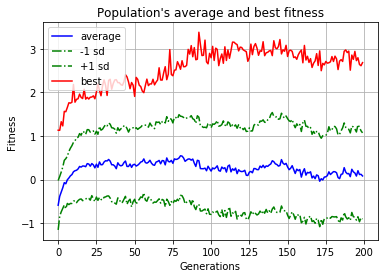

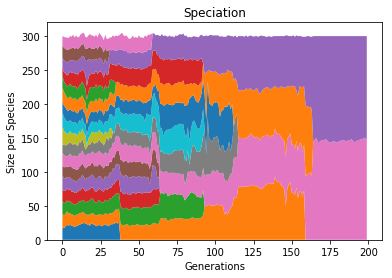

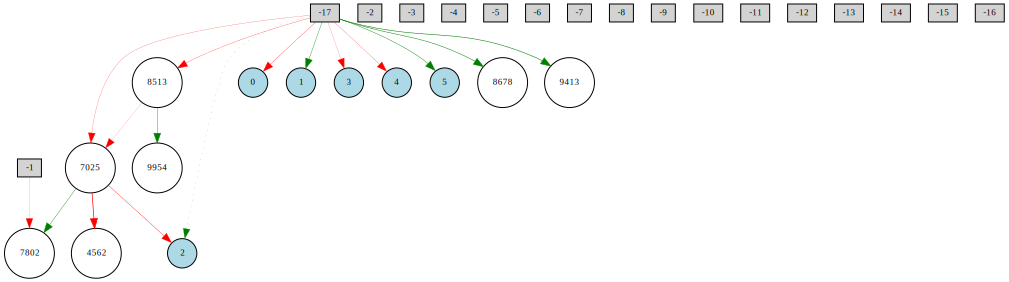

In [4]:
import visualize
best = p.best_genome
visualize.plot_stats(stats, view = True)
visualize.plot_species(stats, view = True)
visualize.draw_net(config, best, view = True)



In [45]:
result = env.step([0,0,0,0,0,0])
for i in result:
    print(i)


[-1.65143213e-01  2.65020388e-02  5.77085122e-01  1.36388399e-01
  1.57603853e-01 -2.50754668e-02 -3.09753330e-01  1.03845014e-02
 -2.23503022e-01 -1.07006344e+00 -1.85839670e+00 -4.39040450e+00
  1.35610850e+01  1.75980087e+00 -5.46880442e+00  7.12198662e+00
 -4.63687511e+00]
0.32544850899398625
True
{'reward_run': 0.32544850899398625, 'reward_ctrl': -0.0}
